# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [89]:
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [90]:
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [91]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [92]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [93]:
cancer_df.shape

(699, 11)

In [94]:
cancer_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [95]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
cancer_df.isna().count()

ID                             699
ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
Class                          699
dtype: int64

In [96]:
16/699

0.022889842632331903

In [97]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

cancer_df.loc[cancer_df['Bare Nuclei'] == "?"].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

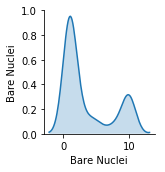

In [98]:
cancer_df_clean = cancer_df.loc[cancer_df['Bare Nuclei'] != "?"]
# print (cancer_df_clean.loc[cancer_df_clean['Bare Nuclei'] == "?"].count())
bare_nuclei = cancer_df_clean['Bare Nuclei'].astype(int)
bare_nuclei_df = pd.DataFrame(bare_nuclei)
sns.pairplot(data=bare_nuclei_df, diag_kind= "kde")

In [99]:
print(bare_nuclei.mean())
print(bare_nuclei.median())
print(bare_nuclei.mode())


3.5446559297218156
1.0
0    1
dtype: int64


In [100]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
cancer_df.loc[cancer_df['Bare Nuclei'] == "?"] = bare_nuclei.median()
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype(float)

# cancer_df.loc[cancer_df['Bare Nuclei'] == "?"].count()
# cancer_df.info()

In [101]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null float64
ClumpThickness                 699 non-null float64
Cell Size                      699 non-null float64
Cell Shape                     699 non-null float64
Marginal Adhesion              699 non-null float64
Single Epithelial Cell Size    699 non-null float64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null float64
Bland Chromatin                699 non-null float64
Mitoses                        699 non-null float64
Class                          699 non-null float64
dtypes: float64(11)
memory usage: 60.1 KB


In [102]:
# cancer_df_raw = cancer_df.drop_duplicates()
# cancer_df_raw.shape
cancer_df.drop_duplicates(inplace = True)
cancer_df.shape

(676, 11)

# Q4. Perform bi variate analysis including correlation & pairplots. 


In [103]:
# Check for correlation of variable
cancer_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.057003,-0.041181,-0.040824,-0.069278,-0.048107,-0.095991,-0.058843,-0.050999,-0.038151,-0.079059
ClumpThickness,-0.057003,1.000000,0.641175,0.652972,0.489893,0.520032,0.594327,0.557182,0.534264,0.351481,0.716466
Cell Size,-0.041181,0.641175,1.000000,0.905827,0.714839,0.749040,0.690120,0.759619,0.723885,0.462337,0.820292
Cell Shape,-0.040824,0.652972,0.905827,1.000000,0.694240,0.717462,0.711096,0.738124,0.723420,0.443176,0.820386
Marginal Adhesion,-0.069278,0.489893,0.714839,0.694240,1.000000,0.603800,0.676641,0.671993,0.602420,0.418559,0.710795
Single Epithelial Cell Size,-0.048107,0.520032,0.749040,0.717462,0.603800,1.000000,0.583145,0.623210,0.634392,0.484324,0.690067
Bare Nuclei,-0.095991,0.594327,0.690120,0.711096,0.676641,0.583145,1.000000,0.679422,0.588209,0.340000,0.820153
Normal Nucleoli,-0.058843,0.557182,0.759619,0.738124,0.671993,0.623210,0.679422,1.000000,0.669049,0.345910,0.758541
Bland Chromatin,-0.050999,0.534264,0.723885,0.723420,0.602420,0.634392,0.588209,0.669049,1.000000,0.433196,0.721747
Mitoses,-0.038151,0.351481,0.462337,0.443176,0.418559,0.484324,0.340000,0.345910,0.433196,1.000000,0.424286


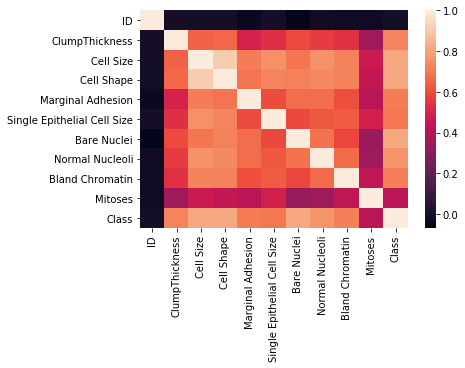

In [47]:
sns.heatmap(cancer_df.corr())

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

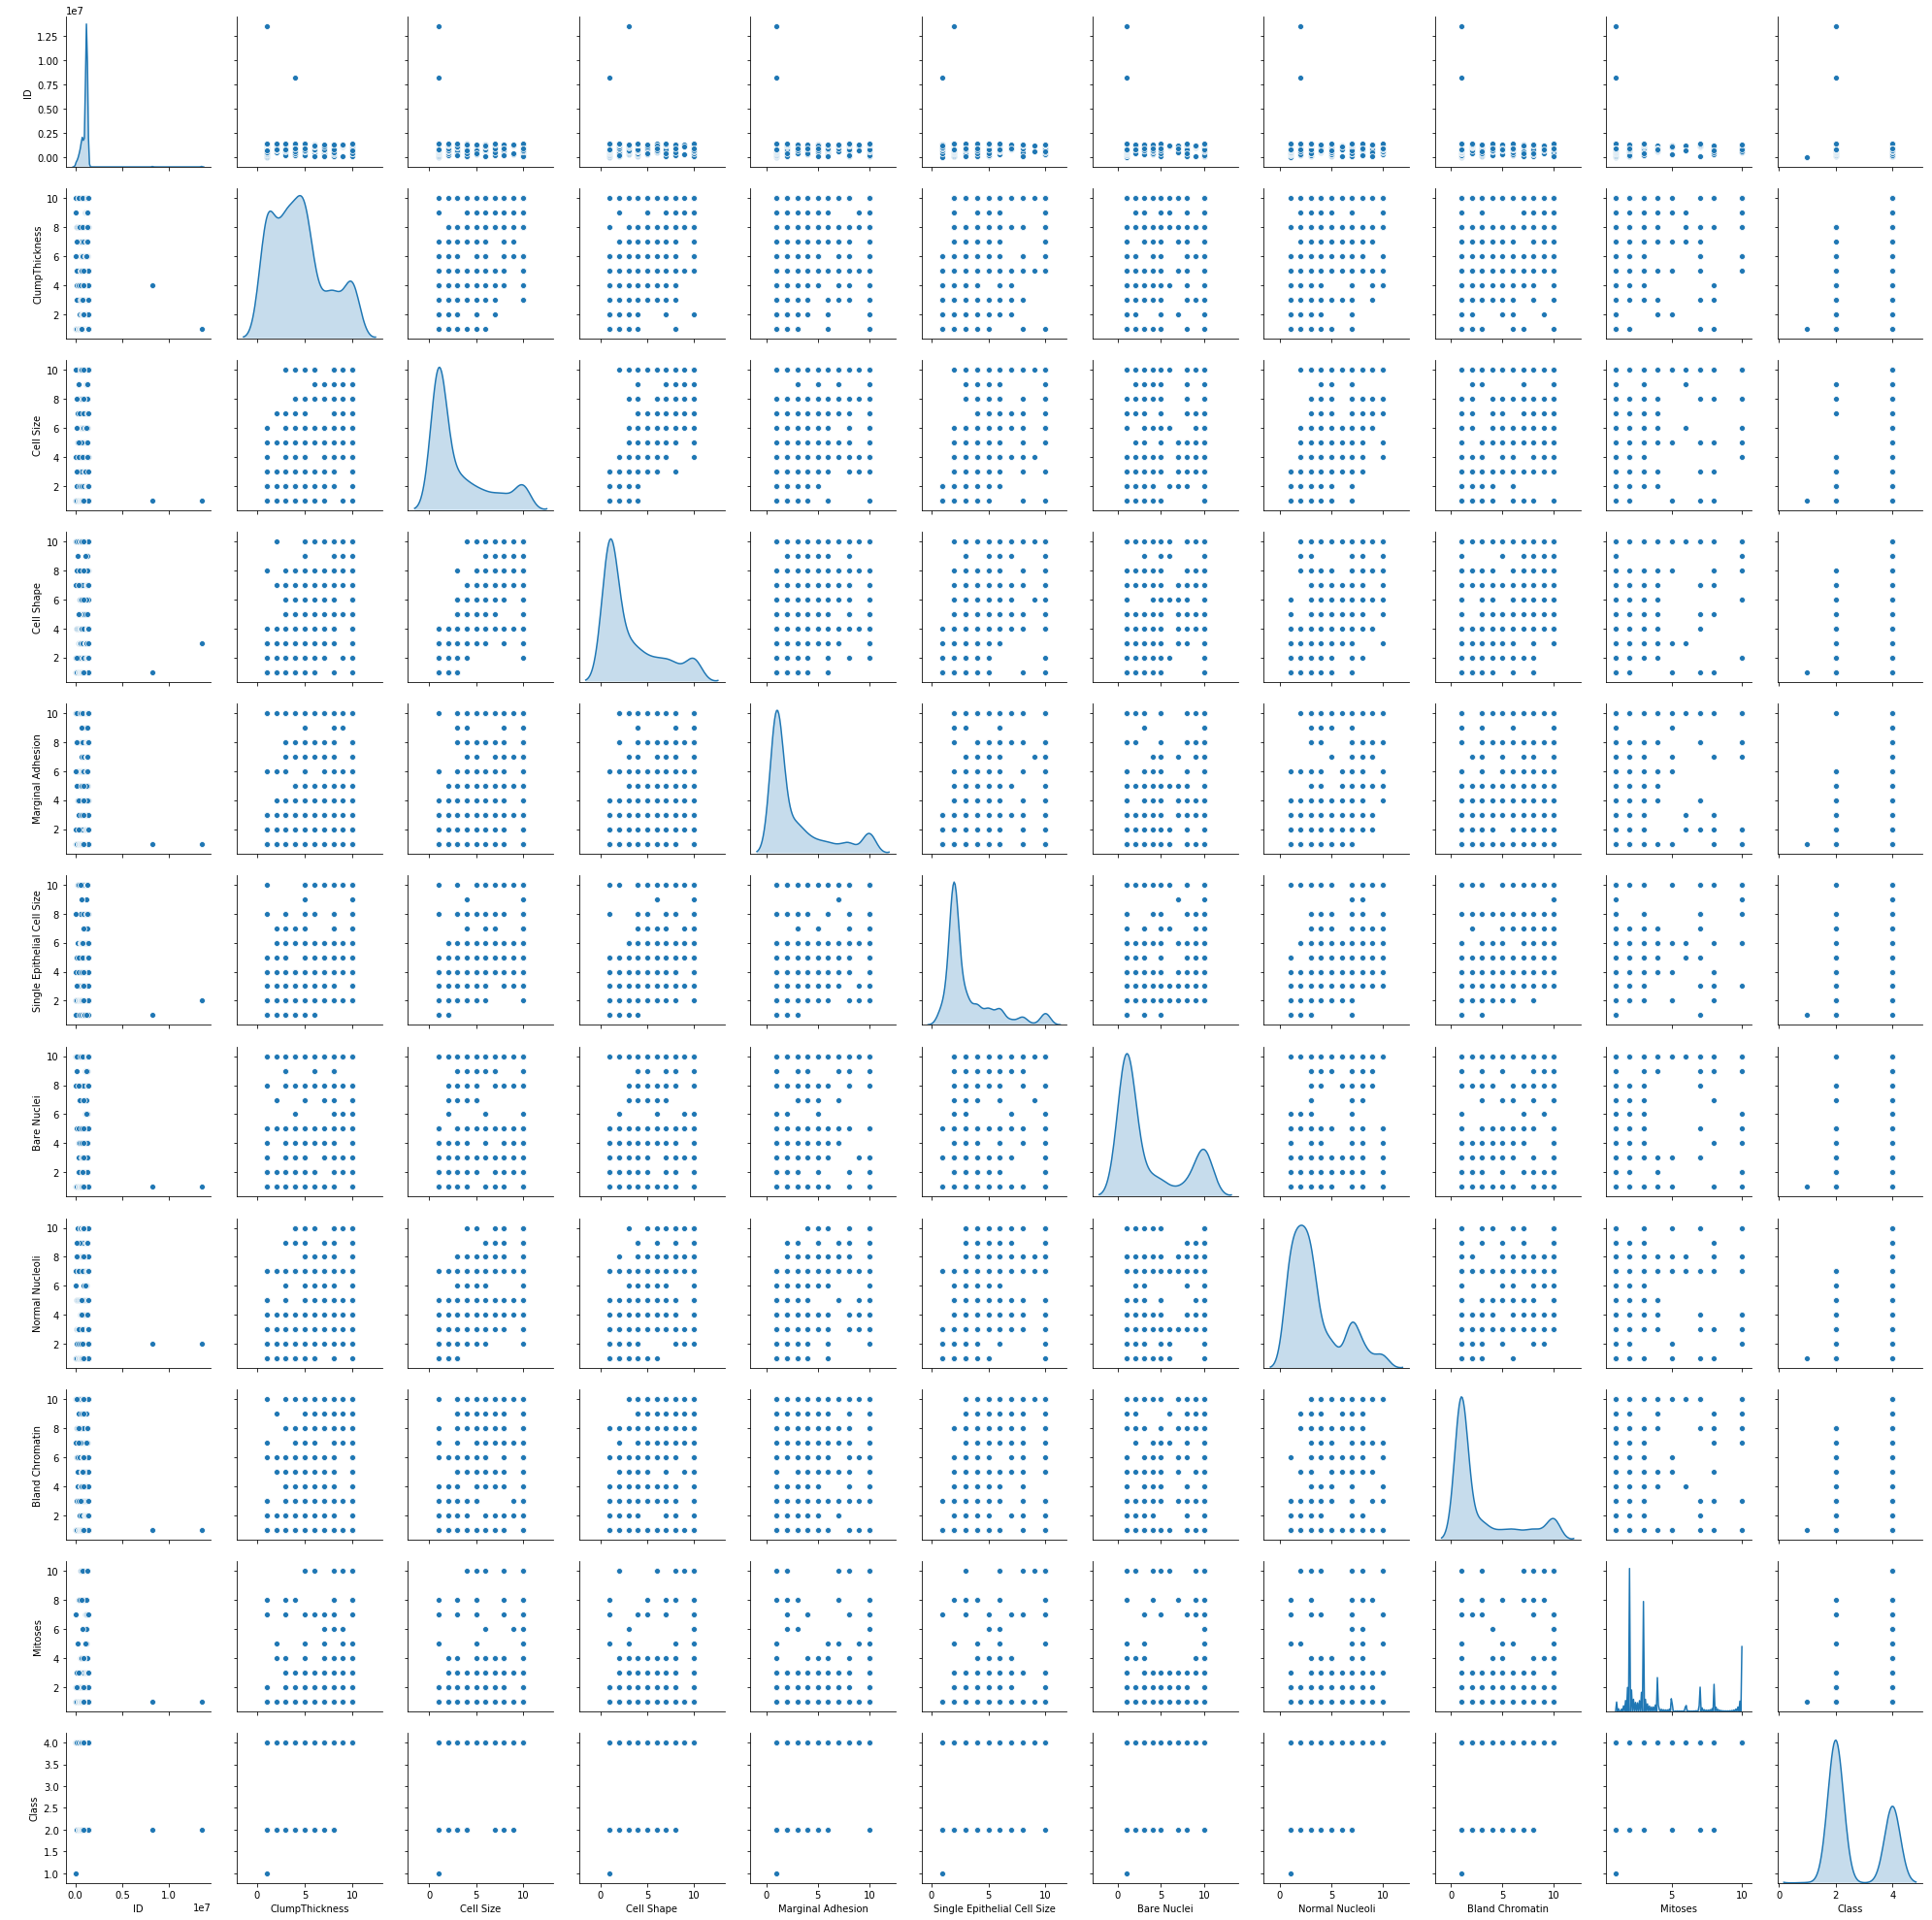

In [117]:
#Let us check for pair plots
sns.pairplot(data = cancer_df, diag_kind = 'kde')

# Q5 Remove any unwanted columns or outliers, standardize variables in this pre-processing step

In [120]:
cancer_df = cancer_df.drop('ID', axis = 1)

In [123]:
# We could see most of the outliers are now removed.
data = cancer_df
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('Class').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cancer_df['Class']))


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3507df60>,
      dtype=object)

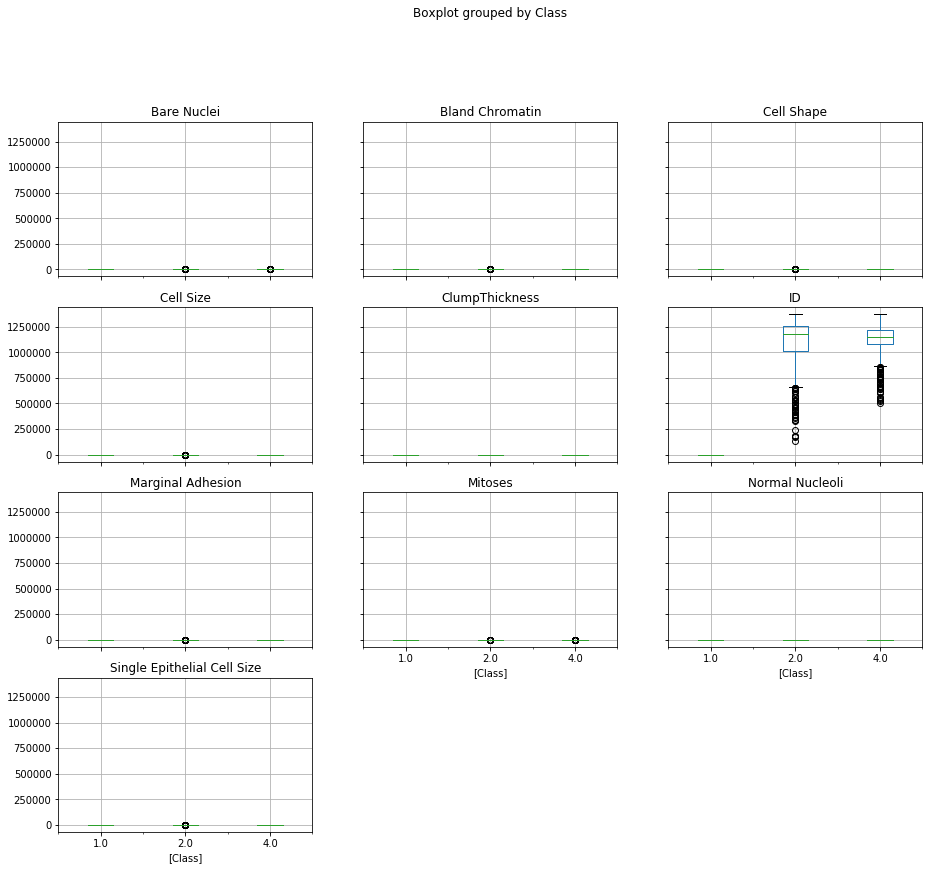

In [112]:
import matplotlib.pylab as plt

concat_data.boxplot(by = 'Class',  layout=(6,3), figsize=(15, 20))


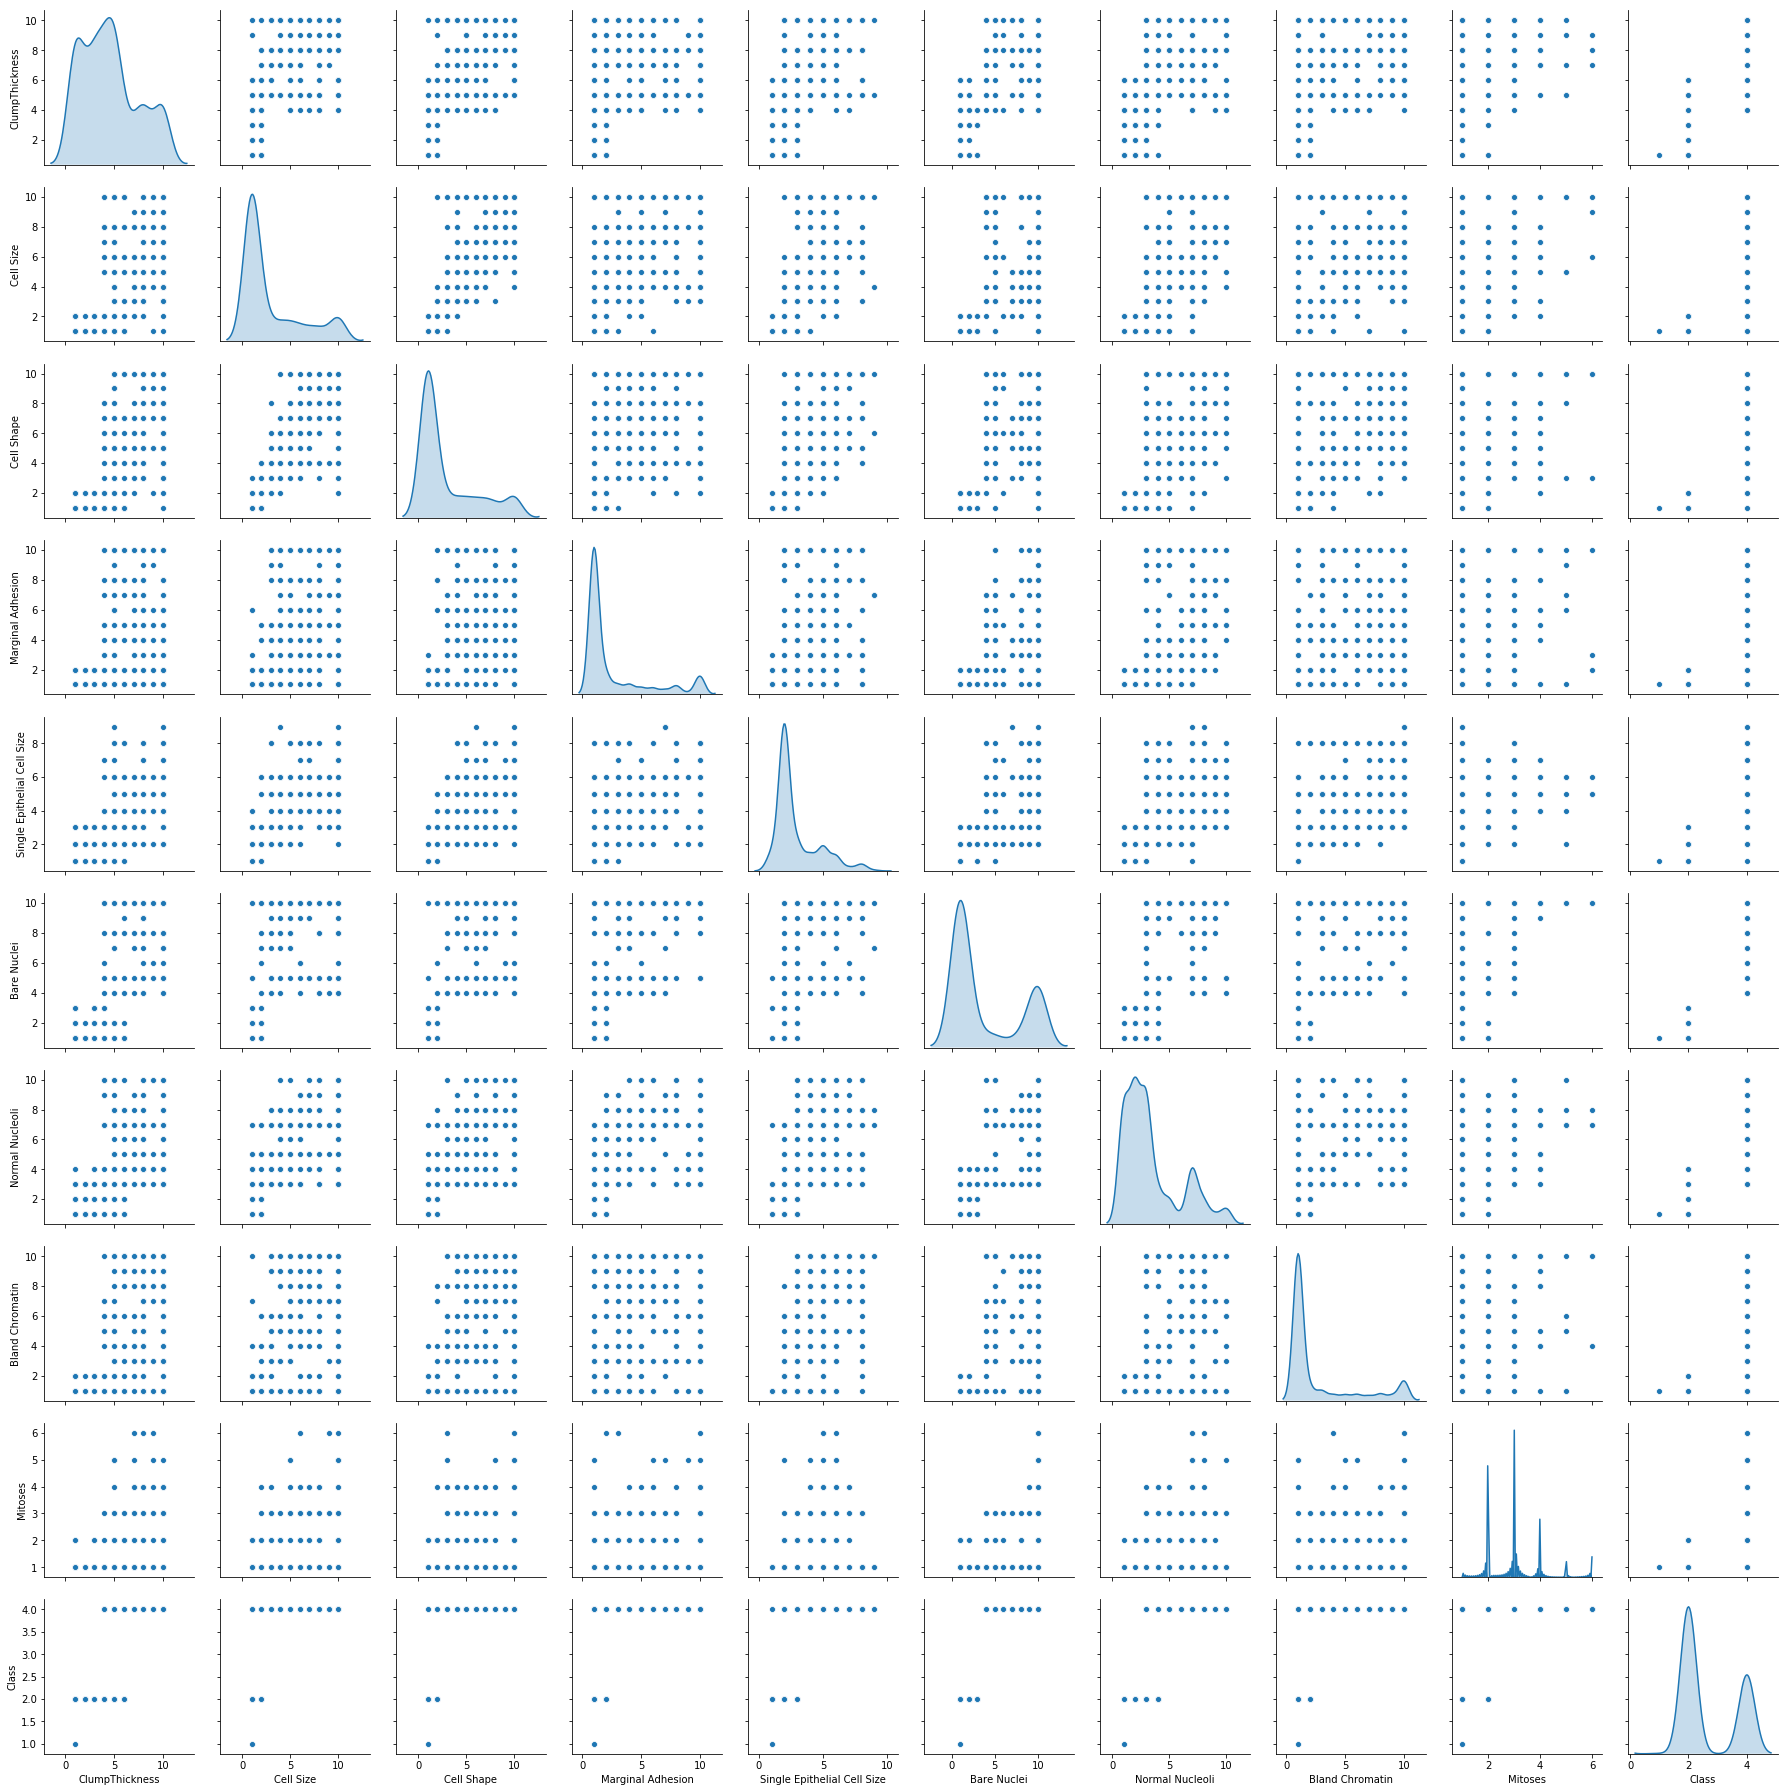

In [124]:
sns.pairplot(concat_data, diag_kind= 'kde')

In [198]:
cancer_df = concat_data

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [199]:
X = cancer_df.drop('Class', axis = 1)
y = cancer_df['Class']
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=7)

In [200]:
X_std = StandardScaler().fit_transform(Xtrain)

# Q6 Create a covariance matrix for identifying Principal components

In [201]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.00211864 0.71603431 0.73375529 0.59339249 0.64533021 0.76779711
  0.68615742 0.58899704 0.35277711]
 [0.71603431 1.00211864 0.92627264 0.76359558 0.79334611 0.81697214
  0.79266039 0.7487096  0.37543672]
 [0.73375529 0.92627264 1.00211864 0.74957945 0.78073933 0.83190419
  0.78909184 0.75566397 0.33313558]
 [0.59339249 0.76359558 0.74957945 1.00211864 0.67830191 0.77493773
  0.69518507 0.69104387 0.36616434]
 [0.64533021 0.79334611 0.78073933 0.67830191 1.00211864 0.75294393
  0.67839408 0.71958747 0.38085321]
 [0.76779711 0.81697214 0.83190419 0.77493773 0.75294393 1.00211864
  0.78184477 0.6991858  0.44780698]
 [0.68615742 0.79266039 0.78909184 0.69518507 0.67839408 0.78184477
  1.00211864 0.73501328 0.34653425]
 [0.58899704 0.7487096  0.75566397 0.69104387 0.71958747 0.6991858
  0.73501328 1.00211864 0.30963196]
 [0.35277711 0.37543672 0.33313558 0.36616434 0.38085321 0.44780698
  0.34653425 0.30963196 1.00211864]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [202]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [203]:
eig_vals

array([6.38532051, 0.82430613, 0.45526358, 0.07130445, 0.15472073,
       0.20888577, 0.25565488, 0.34190288, 0.32170887])

In [204]:
eig_vecs

array([[-0.3214942 , -0.00509327,  0.77941756,  0.01171295, -0.28103041,
         0.13463986,  0.43103601, -0.06204764,  0.04731465],
       [-0.36906727, -0.09733718, -0.02350918,  0.68906396, -0.13638705,
         0.36749842, -0.44641429, -0.04829   , -0.15387928],
       [-0.36831719, -0.15088266,  0.03893813, -0.70197677,  0.09235153,
         0.41060919, -0.38958077, -0.05180775, -0.12531311],
       [-0.33432876, -0.03237307, -0.33631456, -0.06158193, -0.3121595 ,
        -0.02776913,  0.29820785,  0.71053144, -0.27978371],
       [-0.34053036, -0.02739634, -0.16855983, -0.05272336, -0.1521013 ,
        -0.50110097,  0.08307773, -0.56477261, -0.5019854 ],
       [-0.36347887,  0.04852495,  0.18197649,  0.13606651,  0.83541264,
        -0.22930178,  0.05621797,  0.22457074, -0.09905979],
       [-0.34560582, -0.09935836,  0.04188466, -0.05046958, -0.22595218,
        -0.52722079, -0.36596809,  0.12707761,  0.62232268],
       [-0.33185852, -0.15458549, -0.45459869,  0.04833906,  0

# Q8 Find variance and cumulative variance by each eigen vector

In [205]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]
eigen_pairs

[(6.385320510478691,
  array([-0.3214942 , -0.36906727, -0.36831719, -0.33432876, -0.34053036,
         -0.36347887, -0.34560582, -0.33185852, -0.18800609])),
 (0.8243061323045275,
  array([-0.00509327, -0.09733718, -0.15088266, -0.03237307, -0.02739634,
          0.04852495, -0.09935836, -0.15458549,  0.96426757])),
 (0.4552635769299556,
  array([ 0.77941756, -0.02350918,  0.03893813, -0.33631456, -0.16855983,
          0.18197649,  0.04188466, -0.45459869, -0.08596377])),
 (0.0713044486603021,
  array([ 0.01171295,  0.68906396, -0.70197677, -0.06158193, -0.05272336,
          0.13606651, -0.05046958,  0.04833906, -0.04808584])),
 (0.15472072941887474,
  array([-0.28103041, -0.13638705,  0.09235153, -0.3121595 , -0.1521013 ,
          0.83541264, -0.22595218,  0.14497303, -0.0576843 ])),
 (0.20888576762132652,
  array([ 0.13463986,  0.36749842,  0.41060919, -0.02776913, -0.50110097,
         -0.22930178, -0.52722079,  0.29568495,  0.09150488])),
 (0.2556548769498611,
  array([ 0.43103

In [206]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 70.79800989  79.93760337  84.98539309  88.77628243  92.3432683
  95.17787253  97.49391863  99.20940334 100.        ]


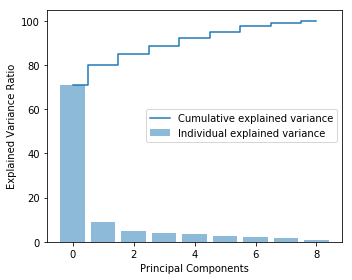

In [207]:
plt.figure(figsize=(5 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [140]:
# X_reduced = PCA(n_components=4).fit_transform(X_std)

In [208]:
pca = PCA(n_components=4)

In [209]:
pca = pca.fit(X_std)
pca.components_

array([[ 0.3214942 ,  0.36906727,  0.36831719,  0.33432876,  0.34053036,
         0.36347887,  0.34560582,  0.33185852,  0.18800609],
       [-0.00509327, -0.09733718, -0.15088266, -0.03237307, -0.02739634,
         0.04852495, -0.09935836, -0.15458549,  0.96426757],
       [ 0.77941756, -0.02350918,  0.03893813, -0.33631456, -0.16855983,
         0.18197649,  0.04188466, -0.45459869, -0.08596377],
       [-0.06204764, -0.04829   , -0.05180775,  0.71053144, -0.56477261,
         0.22457074,  0.12707761, -0.31277869, -0.05385026]])

In [210]:
pca.explained_variance_

array([6.38532051, 0.82430613, 0.45526358, 0.34190288])

In [211]:
pca.explained_variance_ratio_


array([0.7079801 , 0.09139593, 0.0504779 , 0.03790889])

# Q10 Find correlation between components and features

In [212]:

X_reduced = PCA(n_components=4).fit_transform(X_std)

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


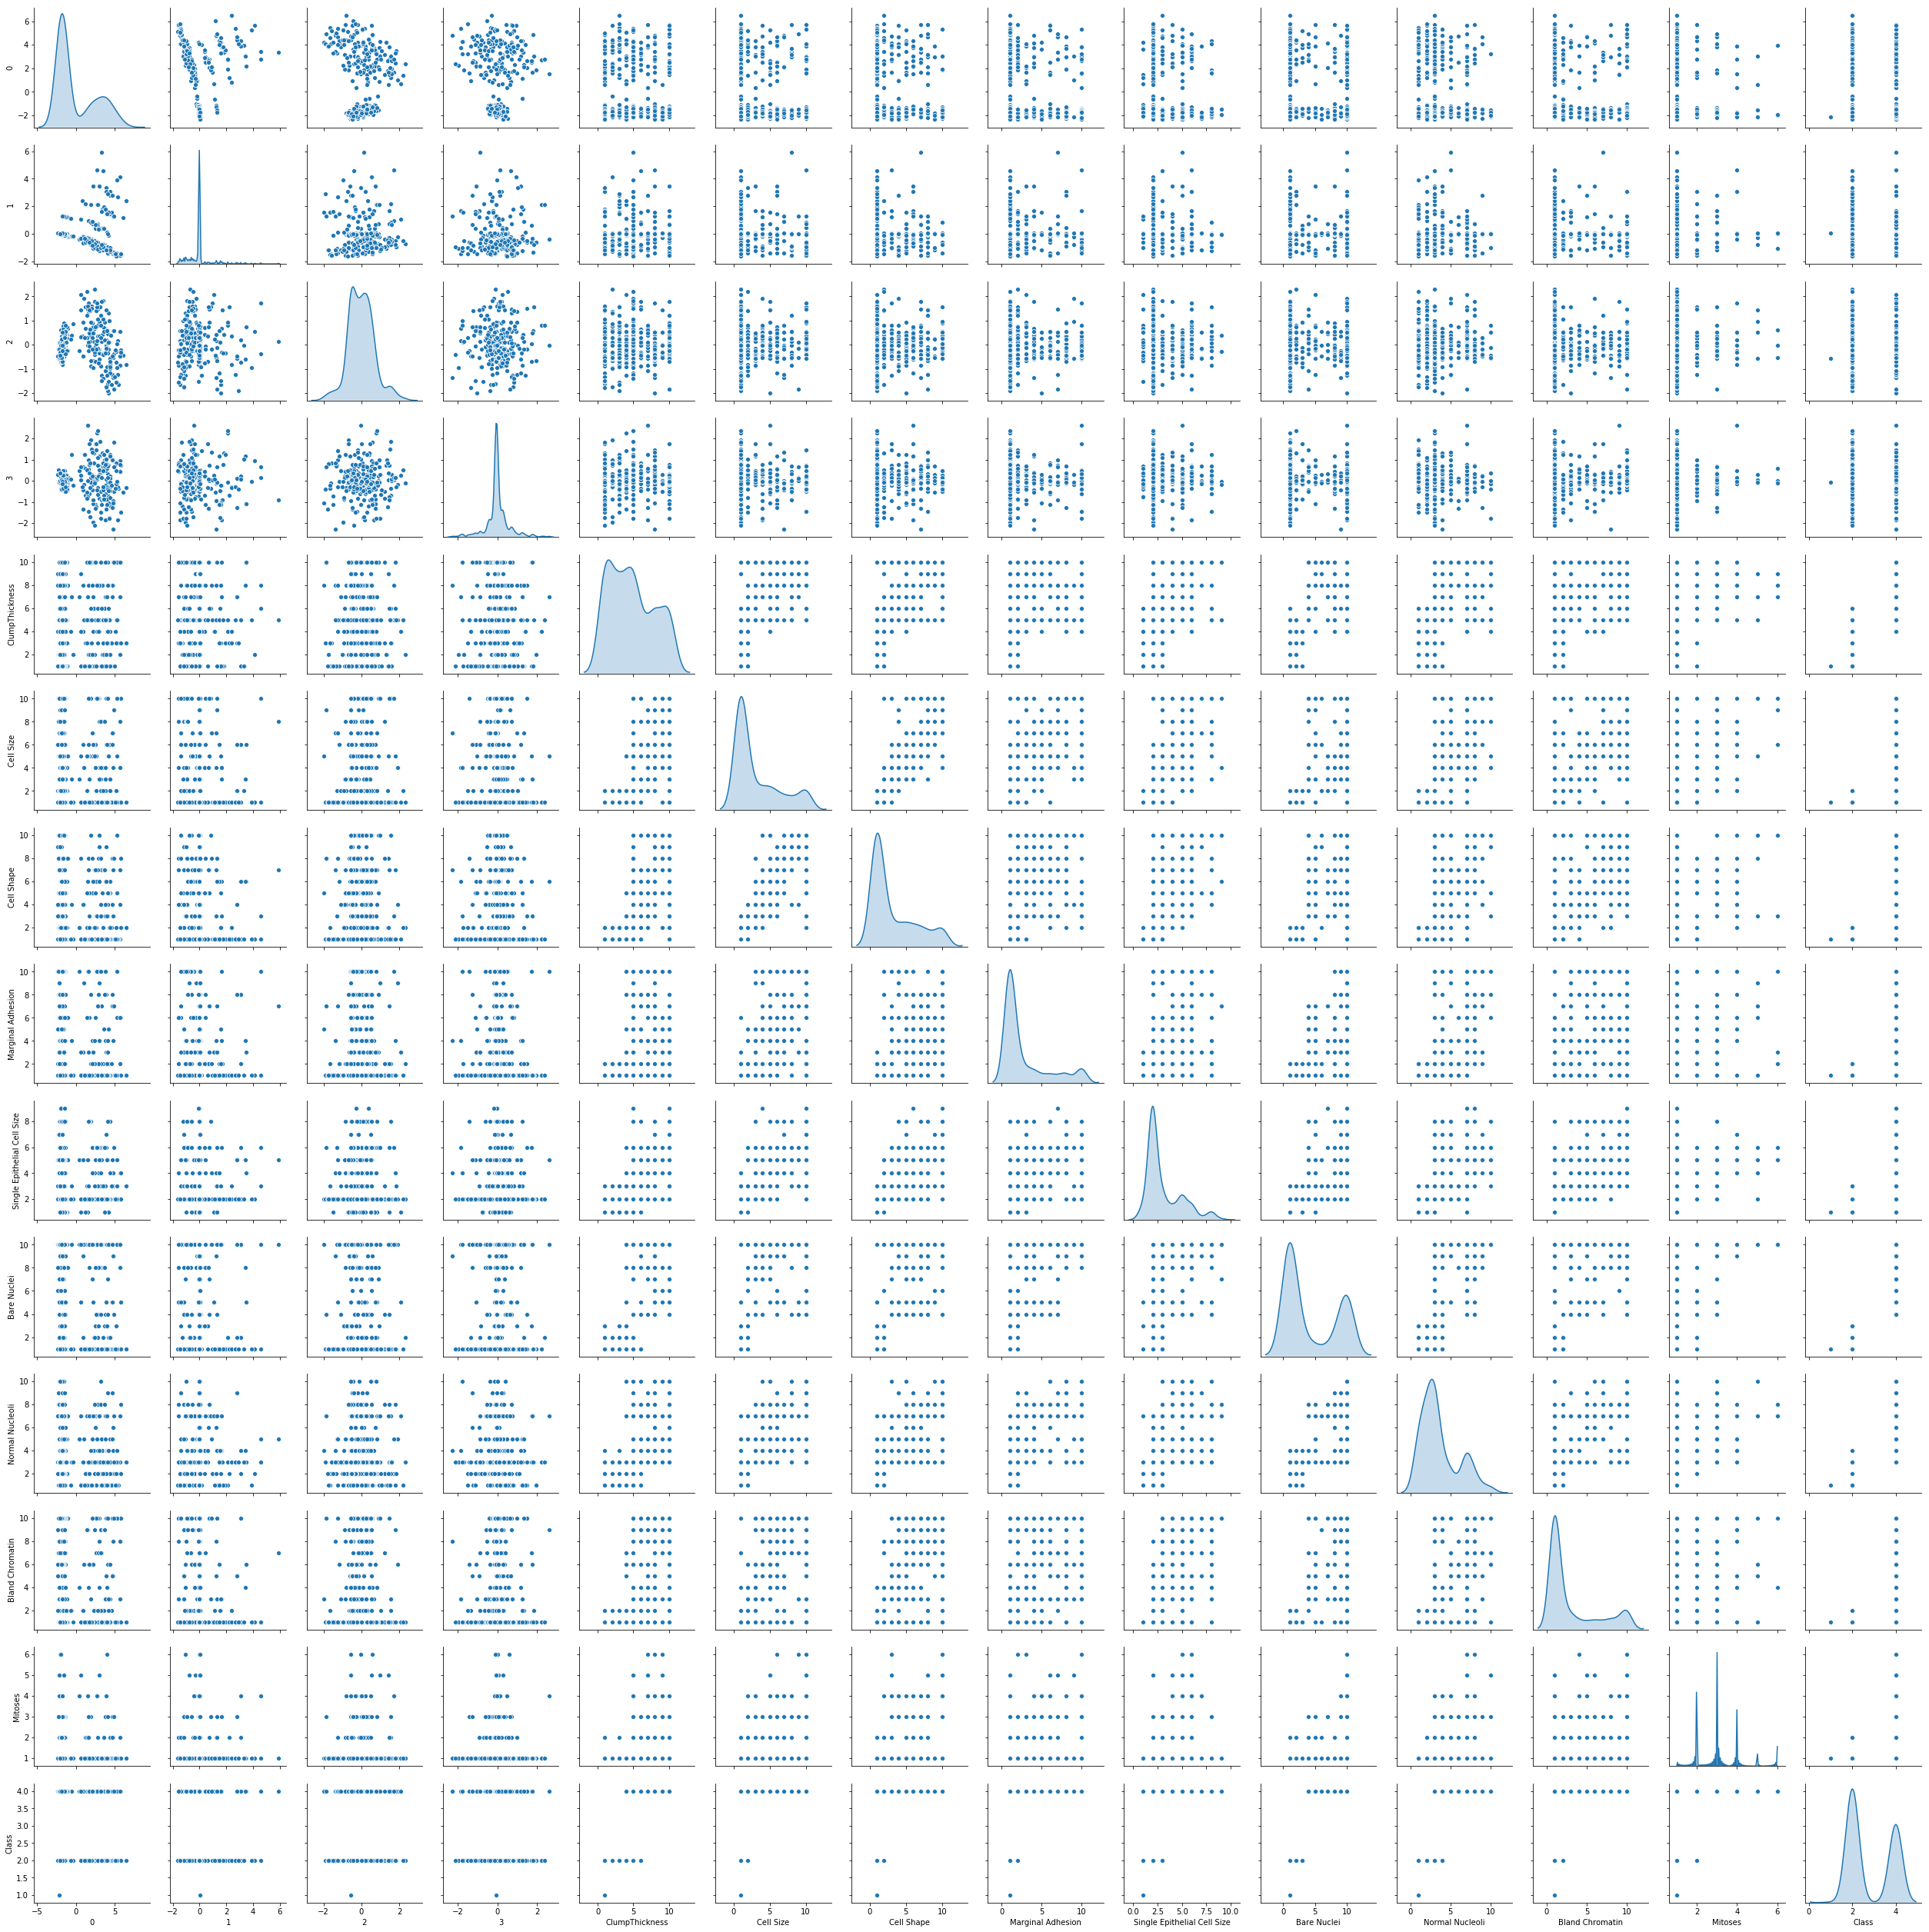

In [215]:
cancer_df_pca = pd.DataFrame(X_reduced)
cancer_df_pca = cancer_df_pca.join(cancer_df)

sns.pairplot(cancer_df_pca, diag_kind = 'kde')

In [216]:
cancer_df_pca.corr()

,0,1,2,3,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1.000000e+00,7.644570e-17,1.212647e-16,-9.599372e-17,-0.028003,-0.032893,-0.070880,-0.049816,-0.046091,-0.056539,-0.074884,-0.043913,-0.023707,-0.033484
1,7.644570e-17,1.000000e+00,-4.120973e-16,-1.928186e-16,0.031254,0.020062,-0.004520,0.037356,0.028104,0.023295,0.006373,-0.010563,0.059697,0.015227
2,1.212647e-16,-4.120973e-16,1.000000e+00,4.829147e-17,0.037107,0.032135,0.014221,0.008035,-0.006145,-0.001000,0.037309,-0.007338,0.031067,0.015526
3,-9.599372e-17,-1.928186e-16,4.829147e-17,1.000000e+00,0.010931,0.004926,0.004461,0.011106,0.043951,0.013283,-0.012220,0.082953,0.024851,0.027352
ClumpThickness,-2.800317e-02,3.125443e-02,3.710741e-02,1.093128e-02,1.000000,0.718452,0.739680,0.559269,0.611766,0.777682,0.676600,0.602766,0.338065,0.827869
Cell Size,-3.289301e-02,2.006154e-02,3.213481e-02,4.926309e-03,0.718452,1.000000,0.916708,0.701579,0.770471,0.783208,0.732167,0.741396,0.399559,0.822482
Cell Shape,-7.087978e-02,-4.520451e-03,1.422062e-02,4.461436e-03,0.739680,0.916708,1.000000,0.686749,0.764277,0.809914,0.743766,0.754820,0.355502,0.843962
Marginal Adhesion,-4.981551e-02,3.735647e-02,8.034978e-03,1.110584e-02,0.559269,0.701579,0.686749,1.000000,0.646942,0.738349,0.653656,0.624078,0.373015,0.714600
Single Epithelial Cell Size,-4.609059e-02,2.810358e-02,-6.145143e-03,4.395142e-02,0.611766,0.770471,0.764277,0.646942,1.000000,0.723946,0.655385,0.712277,0.370336,0.752591
Bare Nuclei,-5.653929e-02,2.329506e-02,-9.997002e-04,1.328315e-02,0.777682,0.783208,0.809914,0.738349,0.723946,1.000000,0.758646,0.682378,0.424090,0.948330


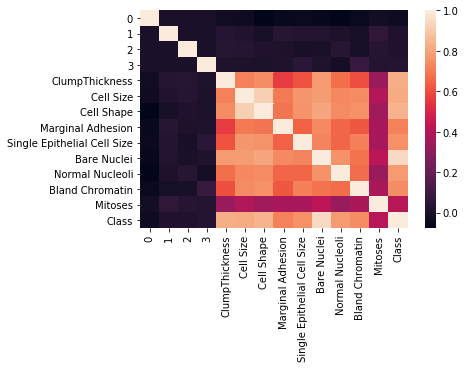

In [217]:
sns.heatmap(cancer_df_pca.corr())

In [196]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(max_depth=2, random_state=42)
# # model.fit(pca.fit_transform(X_reduced), ytrain)

In [195]:
# model.score(pca.transform(Xtest), ytest)